Output()

Output()

<IPython.core.display.Javascript object>


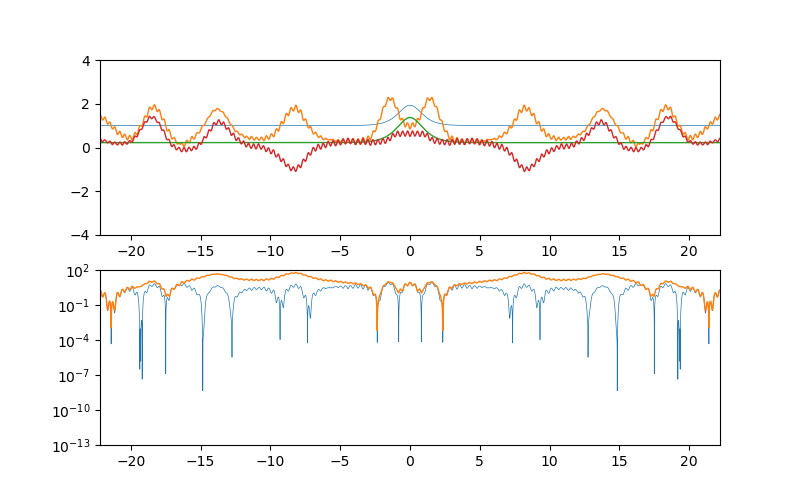

In [5]:
from NLS.brizers import *
from NLS.nls_adapter import *
import cmath
import numpy as np
from skimage.transform import resize
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
import k3d

A=1-1/8
A=1
N=16*1024
NZ=1000;
NZ=200;

mm=256+256;
mm=2;
#mm=32
omagnus=1
#mm=256;
#omagnus=0
flags=-1;

flags=0;
alpha=0*1e-8;

sname='nls-exp-dec';
sname='nls';
sname='ssf';omagnus=0
[pT,pZ]=brizerKM_periods(A);
LT=5*abs(pT);
LZ=8/11*2*2.5*abs(pZ);
NvT=200;
NvZ=300;
tLv=np.linspace(-LT,LT,NvT);
zLv=np.linspace(-LZ*0,LZ,NvZ);
[TTv,ZZv]=np.meshgrid(tLv,zLv);
#figure
#tic
FFv=brizerKM(TTv,ZZv,A);

plot = k3d.plot(axes=['T', 'z', 'Amp'],grid_auto_fit=True,);
xmin, xmax, ymin, ymax = -5, 5, -5, 5;
cm = k3d.matplotlib_color_maps.Plasma;
z=10*FFv/np.max(FFv.flatten());
z=z.real.astype(np.float32);
plt_surface = k3d.surface(z, color_map=cm, attribute=z, color_range=[-2,6],  xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
#plt_surface.grid=(-40, 40,ymin,ymax)
#plot.grid=(-40, 40,ymin,ymax,np.min(z), np.max(z));
#plot.model_matrix=[[100.,  0.,  0.,  0.],
 #        [ 0., 1.,  0.,  0.],
#         [ 0.,  0.,  1.,  0.],
#         [ 0.,  0.,  0.,  1.]];
plt_surface.model_matrix=[[1.,  0.,  0.,  0.],
         [ 0., 1.,  0.,  0.],
         [ 0.,  0.,  0.1,  0.],
         [ 0.,  0.,  0.,  1]];
plot += plt_surface;
plot.render();
plot.display();

plot2 = k3d.plot(axes=['T', 'z', 'Amp'],grid_auto_fit=True,);
xmin, xmax, ymin, ymax = -5, 5, -5, 5;
cm = k3d.matplotlib_color_maps.Plasma;
z=10*np.abs(FFv)/np.max(np.abs(FFv.flatten()));
z=z.real.astype(np.float32);
plt_surface = k3d.surface(z, color_map=cm, attribute=z, color_range=[-2,6],  xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
#plt_surface.grid=(-40, 40,ymin,ymax)
#plot.grid=(-40, 40,ymin,ymax,np.min(z), np.max(z));
#plot.model_matrix=[[100.,  0.,  0.,  0.],
 #        [ 0., 1.,  0.,  0.],
#         [ 0.,  0.,  1.,  0.],
#         [ 0.,  0.,  0.,  1.]];
plt_surface.model_matrix=[[1.,  0.,  0.,  0.],
         [ 0., 1.,  0.,  0.],
         [ 0.,  0.,  0.1,  0.],
         [ 0.,  0.,  0.,  1]];
plot2 += plt_surface;
plot2.render();
plot2.display();
#toc
#surf(ZZv,TTv,abs(FFv))
#title('brizer_{ex}')
tt=np.linspace(-LT,LT,N+1);
tt=tt[0:N]
g=1;
[nls,dzu,h]=nls_rescale_to(tt,sname,g);
hz=LZ/NZ; 
dz=hz* dzu/mm

nls.reset(dt=dz,nm=[4,4],omagnus=omagnus,alpha=alpha,w=1/3,flags=flags);

z=0;
x0=brizerKM(tt,z,A);




nr=np.linalg.norm(x0)*(np.max(tt)-np.min(tt))/N;

nls.x=x0;
xr=x0;
xe=x0;
#fh=figure
#gfun=@real; 

xxr=np.zeros((NZ,N), dtype=complex);
xxr[0,:]=xr;

errmax=-1e100;
fig = plt.figure(1,figsize=(8,5))

#ax = plt.axes(xlim=(np.min(tt), np.max(tt)), ylim=(-2,2))
ax = fig.add_subplot(211,xlim=(np.min(tt), np.max(tt)), ylim=(-4,4))
line, = ax.plot([], [], linewidth=0.5)
line2, = ax.plot([], [], linewidth=1)
line11,=ax.plot([], [], linewidth=1)
line21,=ax.plot([], [], linewidth=1)

ax2=fig.add_subplot(212,xlim=(np.min(tt), np.max(tt)), ylim=(1e-13,100), yscale='log');
line3, = ax2.semilogy([], [], linewidth=0.5)
line4, = ax2.semilogy([], [], linewidth=1)
#xr=np.arange(np.size(t)*int(REP), dtype=np.clongdouble).reshape(int(REP),np.size(t));
xr=np.arange(np.size(tt)*int(NZ), dtype=np.clongdouble).reshape(int(NZ),np.size(tt));
xe=np.arange(np.size(tt)*int(NZ), dtype=np.clongdouble).reshape(int(NZ),np.size(tt));
axe=np.arange(np.size(tt)*int(NZ), dtype=np.clongdouble).reshape(int(NZ),np.size(tt));
#for n in range(2,NZ):

def animate1(i):
    global mm,tt,z,A
    global nr;
    global xxr;
    global z;
    global xe;
    global axe;
    
    xxr[i+1]=nls(rep=int(mm),pp=1);
    
    te=nls.elapsed[0];
    ne=nls.elapsed[1];
    #xxr[n]=xr[i+1];
    
    z=z+hz;
    #xe[i+1]=np.conj(brizerKM(tt,z,A));  
    xe[i+1]=(brizerKM(tt,z,A));
    axe[i+1]=np.abs(xe[i+1]);
    line.set_data(tt, axe[i+1]);
    line2.set_data(tt, np.abs(xxr[i+1]));
    line11.set_data(tt, np.real(xe[i+1]));
    line21.set_data(tt, np.real(xxr[i+1]));
    
    line3.set_data(tt,(np.abs(np.abs(xe[i+1])-np.abs(xxr[i+1]))/nr)**2);
    line4.set_data(tt,np.abs(((xe[i+1]-xxr[i+1])/nr))**2);
    
    #set(0, 'CurrentFigure', fh);
    #subplot(2,1,1)
   
    #plot(tt,abs(xe),'b',tt,abs(xr),'m',tt,gfun(xe),'k',tt,gfun(xr),'g');grid minor;legend('|\Psi_{an}|','|\Psi_{num}|','Re\Psi_{an}','Re\Psi_{num}')
    #title(sprintf('[%d] z=%f elapsed=[sec:%3.3f iter:%d ]',n,z,te,ne));
    # subplot(2,1,2)
    #semilogy(tt,(abs(abs(xe)-abs(xr))/nr).^2,tt,(abs(xe-xr)/nr).^2);grid minor;legend('|\delta\rho|','|\delta\Psi|')
    #axis([-LT,LT,1e-14,5]);
    em=20*np.log10(np.max(np.abs(xe-xxr)/nr));
    #if errmax<em:
    #    errmax=em;
    return line,line2,line11,line21,line3,line4
  
    #title(sprintf('error Brizer - %s  err = %3.1f dB [%3.1f dB]_{max}  [magnus=%d,flags=%d]  ',sname,em,errmax,omagnus,flags));
    #;refresh;pause(0.1);
    #% ============================== grapics

'''    
for k in range(NZ-1):
    animate1(k+1);
    plt.pause(1)
'''    
anim = FuncAnimation(fig, animate1, frames=int(NZ), interval=200, blit=True, repeat=False)
#animate1(2);
plt.show()


    

#figure

#surf(ZZv,TTv,abs(xxv))

#title(stxt)

In [3]:
xxr[0,:]=x0;
xxv=resize(np.abs(xxr),(NvZ,NvT));
plot3 = k3d.plot(axes=['T', 'z', 'Amp'],grid_auto_fit=True,);
xmin, xmax, ymin, ymax = -5, 5, -5, 5;
cm = k3d.matplotlib_color_maps.Plasma;
z=10.0*(xxv)/np.max((xxv.flatten()));
z=z.real.astype(np.float32);
plt_surface = k3d.surface(z, color_map=cm, attribute=z, color_range=[-2,6],  xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
#plt_surface.grid=(-40, 40,ymin,ymax)
#plot.grid=(-40, 40,ymin,ymax,np.min(z), np.max(z));
#plot.model_matrix=[[100.,  0.,  0.,  0.],
 #        [ 0., 1.,  0.,  0.],
#         [ 0.,  0.,  1.,  0.],
#         [ 0.,  0.,  0.,  1.]];
plt_surface.model_matrix=[[1.,  0.,  0.,  0.],
         [ 0., 1.,  0.,  0.],
         [ 0.,  0.,  0.1,  0.],
         [ 0.,  0.,  0.,  1]];
plot3 += plt_surface;
plot3.render();
plot3.display();

Output()

In [4]:
xxr[0,:]=x0;
xxv=resize(xxr.real,(NvZ,NvT));
plot3 = k3d.plot(axes=['T', 'z', 'Amp'],grid_auto_fit=True,);
xmin, xmax, ymin, ymax = -5, 5, -5, 5;
cm = k3d.matplotlib_color_maps.Plasma;
z=10.0*(xxv)/np.max((xxv.flatten()));
z=z.real.astype(np.float32);
plt_surface = k3d.surface(z, color_map=cm, attribute=z, color_range=[-2,6],  xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
#plt_surface.grid=(-40, 40,ymin,ymax)
#plot.grid=(-40, 40,ymin,ymax,np.min(z), np.max(z));
#plot.model_matrix=[[100.,  0.,  0.,  0.],
 #        [ 0., 1.,  0.,  0.],
#         [ 0.,  0.,  1.,  0.],
#         [ 0.,  0.,  0.,  1.]];
plt_surface.model_matrix=[[1.,  0.,  0.,  0.],
         [ 0., 1.,  0.,  0.],
         [ 0.,  0.,  0.1,  0.],
         [ 0.,  0.,  0.,  1]];
plot3 += plt_surface;
plot3.render();
plot3.display();


Output()

In [ ]:
anim

In [ ]:

line

In [ ]:
type(line)

In [ ]:
dir(line)


In [ ]:
line.stale


In [ ]:
q,=ax.plot([], [], linewidth=0.5)

In [ ]:
type( q)

In [ ]:
q


$\frac{d}{{d z}}A = {\beta_2}\frac{{d^2}}{dt^2}A$